In [4]:
import pandas as pd
import numpy as np
import requests
import json
import urllib
from corenlp_xml.document import Document
import string


In [5]:

# path="corenlp_plot_summaries/"
# with open(path+'330.xml', 'r') as file:
#     # print((''.join(file.readlines()[2:])))
#     print(file.readlines()[0][0])
#     doc=''.join(file.readlines()[0:])
#     doc
#     d = Document(doc)
#     # sentences = d.sentences
    
#     # word_to_pos = dict([(token.word, token.pos) for token in sentences[0].tokens])
#     # word_to_pos

# # get xml file and parse it

# # test=pd.read(path+"330.xml")
# # test

In [6]:
import urllib.error
from urllib.error import HTTPError
page='The_Godfather'

def get_views(name) :
    url=f'https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia.org/all-access/all-agents/{page}/monthly/20211001/20221030'
    try:
        resp = urllib.request.urlopen(url) 
        resp_bytes = resp.read()
        data = json.loads(resp_bytes)
        sum=0
        for month in data['items'] :
            sum+=month['views']
            # print(month['views'])

        return sum/12

    except:
        return 0
    # except urllib.error.HTTPError as err:
    #     print(err.code)
    
    
(get_views(page))

347649.25

In [7]:
page="Buttermilk_and_Cigarettes"
url=f'https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia.org/all-access/all-agents/{page}/monthly/20211001/20221030'
get_views(page)

0

In [8]:
# wikipediapageviews
# for i in movie_names :
#     page=i.replace(' ','_')
#     print(page)
#     print(get_views(page))


In [9]:
# from lxml import etree
# from io import StringIO, BytesIO


# file=open(path+'330.xml','r')
# parser = etree.XMLParser(encoding='UTF-8')
# tree= etree.parse(file,parser)
# root=tree.getroot()
# # print(etree.tostring(root, pretty_print=True))
# for  child in root[0]:
#     print(child.tag)
#     for child1 in child:
#         print(etree.tostring(child1))

In [5]:
# sort by country
import json
movies_header = ['wikipedia_id', 'freebase_id', 'name', 'release_date', 'box_office_revenue', 'runtime', 'languages', 'countries', 'genres']
movies = pd.read_csv('data/movie.metadata.tsv', sep='\t', header=None, names=movies_header)
data = pd.read_csv('data/movie.metadata.tsv', sep='\t', header=None, names=movies_header)
movies.head(5)
print(movies.shape)
# movies=movies['countries'].apply(lambda row: len((eval(row).values())))
# movies=movies['countries'].apply(lambda row: (eval(row).values()))
# movies= pd.DataFrame(movies,columns=['countries'])
# movies['countries'].apply(len)
# movies.describe()
movies.head()



(81741, 9)


,wikipedia_id,freebase_id,name,release_date,box_office_revenue,runtime,languages,countries,genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [6]:
import random
np.random.seed(2)
movie_names=data['name']

mini_set=movie_names.sample(10)
mini_set

64745                                         Musafir
28151      Confessionsofa Ex-Doofus-ItchyFooted Mutha
25234                                   Heaven's Rain
60778                                The Killing Kind
26441                                    Runaway Jury
62960                                             Boy
39600                                 Follow the Boys
33951                       Sunset Carson Rides Again
76567    Band and Battalion of the U.S. Indian School
46312                       Buttermilk and Cigarettes
Name: name, dtype: object

In [7]:

movies=movies['countries'].apply(lambda row: (eval(row).values()))
movies= pd.DataFrame(movies,columns=['countries'])
exploded=pd.DataFrame([[c] for C in movies['countries'] for c in C],columns=['countries'])
len(exploded['countries'].unique())
count=exploded['countries'].value_counts()
count
# count.to_csv('test.csv')

United States of America    34408
India                        8411
United Kingdom               7868
France                       4395
Italy                        3163
                            ...  
Republic of China               1
Macau                           1
Palestinian Territories         1
German Language                 1
Ukranian SSR                    1
Name: countries, Length: 147, dtype: int64

In [8]:
# US=movies['countries'].apply(lambda lis : "United States of America" in lis and len(lis)==1)
US=movies['countries'].apply(lambda lis : "United States of America" in lis)
US_movies=data.loc[US]
print(US.sum())
IN=movies['countries'].apply(lambda lis : "India" in lis)
IN_movies=movies[IN]
print(IN.sum())

mult=movies['countries'].apply(lambda lis : len(lis)>1)
sum(mult)

# one list with all the countries of all the movies
exploded=pd.DataFrame([[c] for C in movies['countries'] for c in C],columns=['countries'])
len(exploded['countries'].unique())
count=exploded['countries'].value_counts()
count.to_csv('test.csv')
US_movies
# tries=count.index.to_series(index=None, name=None)

# for i in range(147):
#     print(tries.iloc[i],count.iloc[i])

# import sys
# original_stdout = sys.stdout # Save a reference to the original standard output

# with open('filename.txt', 'w') as f:
#     sys.stdout = f # Change the standard output to the file we created.
#     print(exploded['countries'].value_counts())
#     sys.stdout = original_stdout # Reset the standard output to its original value
# other_movies=data[not(US.bool)]


34408
8411


,wikipedia_id,freebase_id,name,release_date,box_office_revenue,runtime,languages,countries,genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
5,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen..."
7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ..."
10,175026,/m/017n1p,Sarah and Son,1930,NaN,86.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama"", ""/m/01g6gs"": ""Black-an..."
...,...,...,...,...,...,...,...,...,...
81725,1918494,/m/0660qx,State and Main,2000-08-26,6944471.0,106.0,"{""/m/02bjrlw"": ""Italian Language"", ""/m/02h40lc...","{""/m/0f8l9c"": ""France"", ""/m/09c7w0"": ""United S...","{""/m/0gf28"": ""Parody"", ""/m/09n5t_"": ""Americana..."
81726,664006,/m/030xw6,Guilty as Sin,1993-06-04,22886222.0,107.0,{},"{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
81727,24209227,/m/07k5mlk,"The Time, the Place and the Girl",1946,NaN,105.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/05p553"": ""Comedy film"", ""/m/02l7c8"": ""Rom..."
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}"


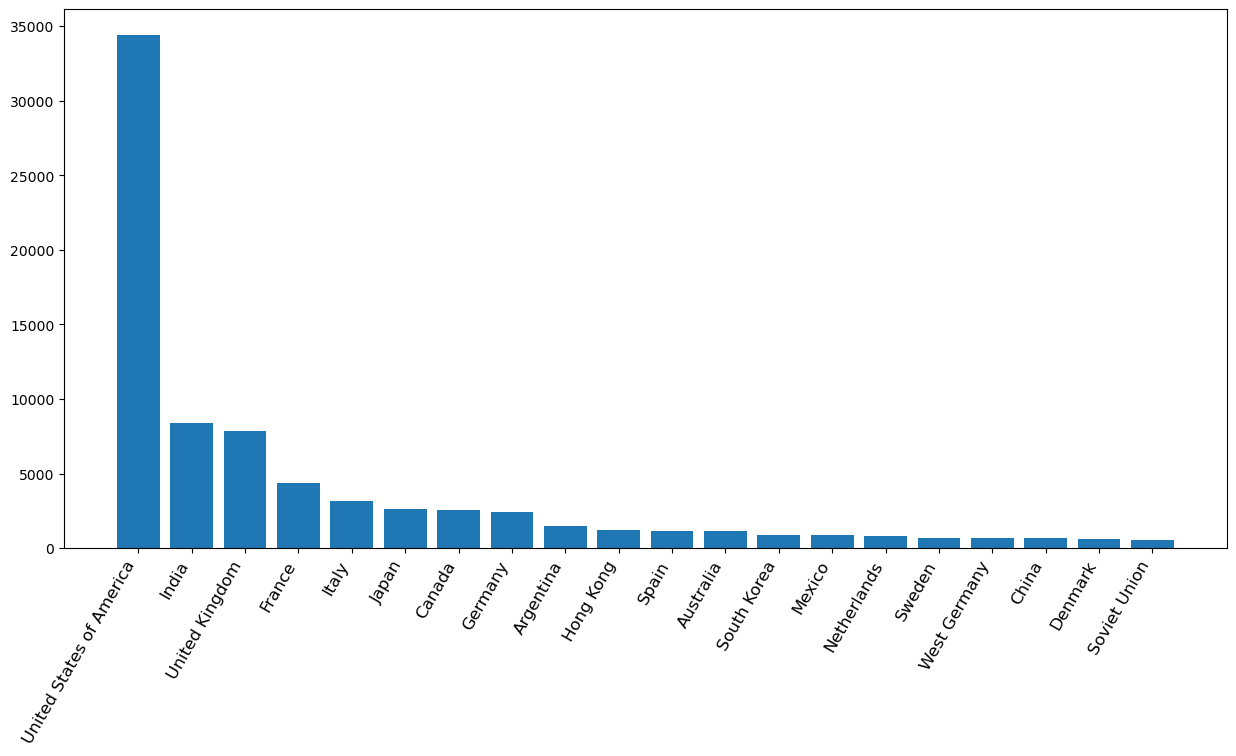

In [9]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(15,7))
plt.bar(count.head(20).index.to_series(),count.head(20))
plt.xticks(rotation=60, horizontalalignment='right', fontsize=12);

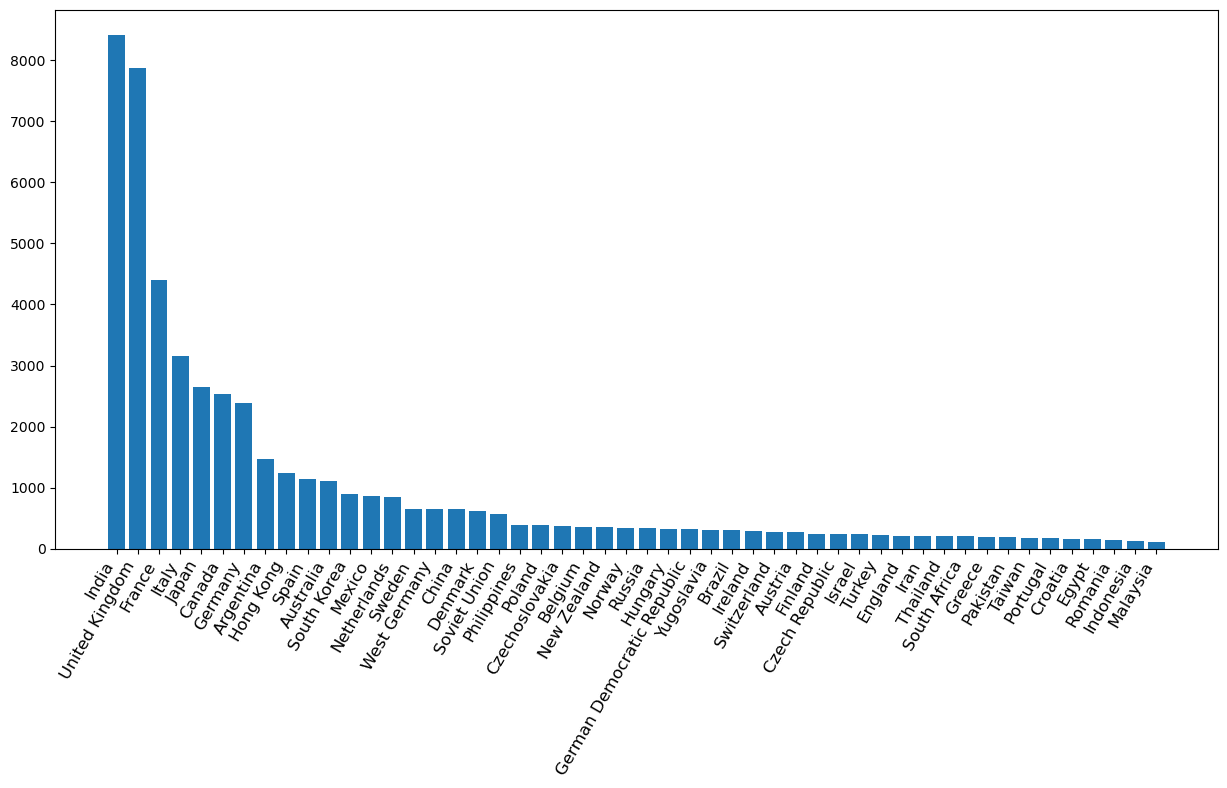

In [15]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(15,7))
plt.bar(count[1:51].index.to_series(),count[1:51])
plt.xticks(rotation=60, horizontalalignment='right', fontsize=12);

Whats left:
movie success and earnings by country
pageviews: english wikipedia :/
evolution in time of movie distribution: us india uk europe russia and former soviet union asia 


In [16]:
# sort movies by date 
data[(data['release_date']<'2000') & (data['release_date']>='1995')]

,wikipedia_id,freebase_id,name,release_date,box_office_revenue,runtime,languages,countries,genres
12,6631279,/m/0gffwj,Little city,1997-04-04,NaN,93.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/0hj3n0w"": ..."
21,612710,/m/02wjqm,New Rose Hotel,1999-10-01,21521.0,92.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
38,26067101,/m/0b6c_nw,Siam Sunset,1999,NaN,91.0,{},"{""/m/0chghy"": ""Australia"", ""/m/0ctw_b"": ""New Z...","{""/m/06cvj"": ""Romantic comedy"", ""/m/02l7c8"": ""..."
46,2487170,/m/07h9zj,Troops,1997,NaN,10.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/068twy"": ""Fan film"", ""/m/02hmvc"": ""Short ..."
57,11633165,/m/02rm6l8,Innocence,1997,NaN,110.0,"{""/m/02hwyss"": ""Turkish Language""}","{""/m/01znc_"": ""Turkey""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
...,...,...,...,...,...,...,...,...,...
81648,11823946,/m/02rtqvb,Twelfth Night: Or What You Will,1996-10-25,588621.0,134.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/06cvj"": ""Romantic comedy"", ""/m/02l7c8"": ""..."
81657,303933,/m/01s7w3,Twister,1996-05-10,494471524.0,113.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/03btsm8"": ""Action/Adventure"", ""/m/01drsx""..."
81678,30553937,/m/0g9ts5h,Confessions of a Sexist Pig,1998-03-07,NaN,91.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/01z4y"": ""C..."
81694,1191380,/m/04f_y7,Wilde,1997,2158775.0,118.0,"{""/m/02h40lc"": ""English Language""}","{""/m/014tss"": ""Kingdom of Great Britain"", ""/m/...","{""/m/0hn10"": ""LGBT"", ""/m/017fp"": ""Biography"", ..."


In [17]:
set1=data[data['release_date']<'1985']
set2=data[data['release_date']>'1985']
set1=set1['countries']
set2=set2['countries']
def analysis(set) :
    set=set.apply(lambda row: (eval(row).values()))
    set= pd.DataFrame(set,columns=['countries'])
    exploded=pd.DataFrame([[c] for C in set['countries'] for c in C],columns=['countries'])
    # len(exploded['countries'].unique())
    count=exploded['countries'].value_counts()
    count.to_csv('test.csv')
    return count

c1=analysis(set1)
c2=analysis(set2)

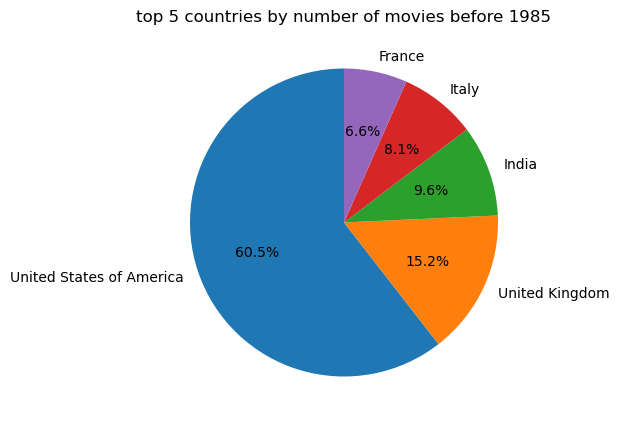

In [18]:
fig, ax = plt.subplots(figsize=(11,5))
# fig.set_facecolor('white')
# fig.set_size_inches(11, 5)
# fig.suptitle('title')
plot_counts=c1.head(5)
plot_countries=plot_counts.index.to_series()
ax.pie(plot_counts, labels=plot_countries, startangle=90,autopct='%1.1f%%', radius=1)
ax.set_title('top 5 countries by number of movies before 1985')
plt.show()
# plot_countries


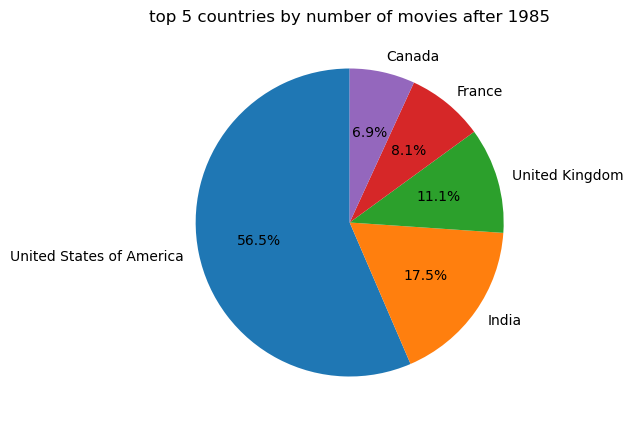

In [19]:
fig, ax = plt.subplots(figsize=(11,5))
# fig.set_facecolor('white')
# fig.set_size_inches(11, 5)
# fig.suptitle('title')
plot_counts=c2.head(5)
plot_countries=plot_counts.index.to_series()
ax.pie(plot_counts, labels=plot_countries, startangle=90,autopct='%1.1f%%', radius=1)
ax.set_title('top 5 countries by number of movies after 1985')
plt.show()

In [10]:
summaries_df=pd.read_table("data/plot_summaries.txt",header=None)
summaries_df.columns=["movie_id","summary"]
summaries_df["length"]=summaries_df["summary"].apply(len)
summaries_df["num_words"]=summaries_df["summary"].apply(lambda x: x.split()).apply(len)


In [11]:

# summaries_df.describe()
summaries_df

,movie_id,summary,length,num_words
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",178,25
1,31186339,The nation of Panem consists of a wealthy Capi...,4559,778
2,20663735,Poovalli Induchoodan is sentenced for six yea...,3099,496
3,2231378,"The Lemon Drop Kid , a New York City swindler,...",4917,849
4,595909,Seventh-day Adventist Church pastor Michael Ch...,2425,397
...,...,...,...,...
42298,34808485,"The story is about Reema , a young Muslim scho...",220,40
42299,1096473,"In 1928 Hollywood, director Leo Andreyev look...",2971,524
42300,35102018,American Luthier focuses on Randy Parsons’ tra...,871,160
42301,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se...",1289,230


In [12]:
import nltk
# import random
# np.random.seed

example=summaries_df.sample()
example=example.iloc[0]["summary"]
example


'Stan and Ollie, after consorting with Seymore "Sy" Roberts, an old prospector, have been entrusted to deliver the deed to a gold mine the prospector discovered to the man\'s daughter, Mary Roberts , a poor young woman living in Brushwood Gulch who is consistently victimized by her cruel guardians, saloon owner Mickey Finn ([[James Finlayson , and his equally-cruel saloon-singer wife, Lola Marcel . Traveling by stage coach, they attempt to flirt with the woman  who is riding with them. She rebuffs the pair, and upon arriving in Brushwood Gulch, she complains to her husband, the town\'s sheriff . The angry sheriff orders the pair to leave on the next coach out of town, or else they\'ll be "riding out of here in a hearse". Stan and Ollie promise to do so once they have completed their mission. After dancing to "At the Ball, That\'s All" by The Avalon Boys, Stan and Ollie arrive at Mickey Finn\'s saloon. When Mickey Finn learns why they\'re here, he has Lola play Mary in order to hijack t

In [13]:
# nltk.word_tokenize(example["summary"])
sentence="""i am tired of my life."""
nltk.word_tokenize(sentence)


['i', 'am', 'tired', 'of', 'my', 'life', '.']

In [14]:
selfdestruct=summaries_df["summary"].head(100).apply(nltk.word_tokenize)


In [15]:
selfdestruct.sum()

['Shlykov',
 ',',
 'a',
 'hard-working',
 'taxi',
 'driver',
 'and',
 'Lyosha',
 ',',
 'a',
 'saxophonist',
 ',',
 'develop',
 'a',
 'bizarre',
 'love-hate',
 'relationship',
 ',',
 'and',
 'despite',
 'their',
 'prejudices',
 ',',
 'realize',
 'they',
 'are',
 "n't",
 'so',
 'different',
 'after',
 'all',
 '.',
 'The',
 'nation',
 'of',
 'Panem',
 'consists',
 'of',
 'a',
 'wealthy',
 'Capitol',
 'and',
 'twelve',
 'poorer',
 'districts',
 '.',
 'As',
 'punishment',
 'for',
 'a',
 'past',
 'rebellion',
 ',',
 'each',
 'district',
 'must',
 'provide',
 'a',
 'boy',
 'and',
 'girl',
 'between',
 'the',
 'ages',
 'of',
 '12',
 'and',
 '18',
 'selected',
 'by',
 'lottery',
 'for',
 'the',
 'annual',
 'Hunger',
 'Games',
 '.',
 'The',
 'tributes',
 'must',
 'fight',
 'to',
 'the',
 'death',
 'in',
 'an',
 'arena',
 ';',
 'the',
 'sole',
 'survivor',
 'is',
 'rewarded',
 'with',
 'fame',
 'and',
 'wealth',
 '.',
 'In',
 'her',
 'first',
 'Reaping',
 ',',
 '12-year-old',
 'Primrose',
 'Everd

In [26]:
import itertools
# all=[]
# all=list(itertools.chain(all,(ls for ls in selfdestruct))) 

In [27]:
all=[]
for ls in selfdestruct :
    all=itertools.chain(all,ls)

list(all)

['Shlykov',
 ',',
 'a',
 'hard-working',
 'taxi',
 'driver',
 'and',
 'Lyosha',
 ',',
 'a',
 'saxophonist',
 ',',
 'develop',
 'a',
 'bizarre',
 'love-hate',
 'relationship',
 ',',
 'and',
 'despite',
 'their',
 'prejudices',
 ',',
 'realize',
 'they',
 'are',
 "n't",
 'so',
 'different',
 'after',
 'all',
 '.',
 'The',
 'nation',
 'of',
 'Panem',
 'consists',
 'of',
 'a',
 'wealthy',
 'Capitol',
 'and',
 'twelve',
 'poorer',
 'districts',
 '.',
 'As',
 'punishment',
 'for',
 'a',
 'past',
 'rebellion',
 ',',
 'each',
 'district',
 'must',
 'provide',
 'a',
 'boy',
 'and',
 'girl',
 'between',
 'the',
 'ages',
 'of',
 '12',
 'and',
 '18',
 'selected',
 'by',
 'lottery',
 'for',
 'the',
 'annual',
 'Hunger',
 'Games',
 '.',
 'The',
 'tributes',
 'must',
 'fight',
 'to',
 'the',
 'death',
 'in',
 'an',
 'arena',
 ';',
 'the',
 'sole',
 'survivor',
 'is',
 'rewarded',
 'with',
 'fame',
 'and',
 'wealth',
 '.',
 'In',
 'her',
 'first',
 'Reaping',
 ',',
 '12-year-old',
 'Primrose',
 'Everd

In [28]:
# nltk.download()

In [16]:
words=nltk.word_tokenize(example,language="english")
freq = nltk.FreqDist(w.lower() for w in words)
x=dict(freq)
y=dict(freq)
print({k: x.get(k, 0) + y.get(k, 0) for k in set(x) | set(y)})

{'seal': 2, 'duped': 2, 'he': 2, 'manage': 4, 'charade': 2, 'flirt': 2, 'series': 2, 'shorts': 2, 'open': 2, 'are': 4, 'most': 2, 'mishaps': 2, 'so': 2, 'consistently': 2, 'get': 2, 'falling': 2, 'chasing': 2, 'ends': 2, 'guardians': 2, 'going': 2, "''": 8, 'accompanied': 2, 'hardy': 2, 'further': 2, 'town': 12, 'into': 10, 'deliver': 2, 'owner': 2, 'hearse': 2, 'real': 2, 'as': 6, '[': 4, 'is': 4, 'trio': 2, 'gulch': 6, 'them': 6, 'seymore': 2, 'saloon': 6, 'ollie': 18, 'never': 2, 'angry': 4, 'ball': 2, 'hijack': 2, 'her': 4, 'ending': 4, 'that': 2, 'at': 8, 'here': 4, 'brushwood': 6, 'wife': 2, 'young': 2, "'": 2, 'hysterics': 2, '(': 2, 'off': 2, 'his': 2, 'try': 2, 'finlayson': 2, 'victimized': 2, 'mickey': 10, "'s": 10, 'orders': 2, 'can': 2, 'why': 2, 'saloon-singer': 2, 'immediately': 2, 'attempt': 4, 'arriving': 2, 'gold': 2, 'dixie': 2, 'sheriff': 6, 'they': 16, 'daughter': 2, 'police': 4, 'order': 2, 'struggle': 2, 'seen': 2, 'make': 2, 'poor': 2, 'out': 8, 'all': 2, 'story'

In [17]:
from collections import Counter
from string import punctuation
def content_text(text):
    stopwords = set(nltk.corpus.stopwords.words('english'))
    # print(stopwords)
    with_stp = Counter()
    without_stp  = Counter()
    for word in text:
        # update count off all words in the line that are in stopwords
        word = word.lower()
        if word in stopwords:
             pass
        else:
           # update count off all words in the line that are not in stopwords
            without_stp.update([word])
            
        with_stp.update([word])
    # return a list with top ten most common words from each
    return [k for k,_ in with_stp.most_common(10)],[y for y,_ in without_stp.most_common(10)]

content_text(nltk.word_tokenize(example))


(['the', ',', 'and', 'to', '.', 'ollie', 'deed', 'stan', 'they', 'in'],
 [',', '.', 'ollie', 'deed', 'stan', 'mary', 'town', "'s", 'mickey', '``'])

In [22]:
import nltk 

paragraph= """I ate fruit the entire day. For breakfast, I had dates. For lunch, I had mangoes. For dinner, I had cantaloupe."""

sentences= nltk.sent_tokenize(paragraph)

length= len(sentences)

sentences

['I ate fruit the entire day.',
 'For breakfast, I had dates.',
 'For lunch, I had mangoes.',
 'For dinner, I had cantaloupe.']

In [32]:
"bruh".isalpha()

True

In [81]:

import spacy
from wordcloud import WordCloud

# from wordcloud_helper import *
# from percentage_analysis import *
# from compound_analysis import *


In [82]:
nlp = spacy.load("en_core_web_sm")
stopwords = set(nltk.corpus.stopwords.words('english'))
nlp.Defaults.stop_words = stopwords

In [35]:
for month in ('01','02','03','04','05','06','07','08','09','10','11','12'):

    j = 0
    words = []
    for chunk in summaries_df.head(100)["summary"]:

        # Convert into single string text
        # text = ""
        # text = ' '.join(quote for quote in chunk.quotation)
        text=chunk
        # Casefolding
        text = text.lower()
        # Remove words shorter than 3 characters
        new_text = ' '.join([w for w in text.split() if len(w)>2])   
       
        # Creating a spacy object
        doc = nlp(new_text)
        # Tokenizer
        tokens = [token.text for token in doc]
        # Lemmatization
        # removing stop words and lematize
        words = words + [token.lemma_ for token in doc if (str(token) in stopwords) != True and token.is_punct != True 
                    and str(token) != '-PRON-' and str(token) != '`']
                    
        print(f'{j+1} chunk')
        j = j+1

    print(f'month {month} done \n')
    
    text_wordcloud = ""
    text_wordcloud = ' '.join(word for word in words)
    
    print(f'month {month} wordcloud processing \n')
    
    # Generate Wordcloud
    wc = WordCloud(background_color="white", max_words=2000, #mask=women_mask,
               stopwords=stopwords, max_font_size=40, random_state=1,height=1000,width=1000,collocation_threshold=5).generate(text_wordcloud)

    # Store to file
    wc.to_file("WordcloudAll.png")

    


    break

1 chunk
2 chunk
3 chunk
4 chunk
5 chunk
6 chunk
7 chunk
8 chunk
9 chunk
10 chunk
11 chunk
12 chunk
13 chunk
14 chunk
15 chunk
16 chunk
17 chunk
18 chunk
19 chunk
20 chunk
21 chunk
22 chunk
23 chunk
24 chunk
25 chunk
26 chunk
27 chunk
28 chunk
29 chunk
30 chunk
31 chunk
32 chunk
33 chunk
34 chunk
35 chunk
36 chunk
37 chunk
38 chunk
39 chunk
40 chunk
41 chunk
42 chunk
43 chunk
44 chunk
45 chunk
46 chunk
47 chunk
48 chunk
49 chunk
50 chunk
51 chunk
52 chunk
53 chunk
54 chunk
55 chunk
56 chunk
57 chunk
58 chunk
59 chunk
60 chunk
61 chunk
62 chunk
63 chunk
64 chunk
65 chunk
66 chunk
67 chunk
68 chunk
69 chunk
70 chunk
71 chunk
72 chunk
73 chunk
74 chunk
75 chunk
76 chunk
77 chunk
78 chunk
79 chunk
80 chunk
81 chunk
82 chunk
83 chunk
84 chunk
85 chunk
86 chunk
87 chunk
88 chunk
89 chunk
90 chunk
91 chunk
92 chunk
93 chunk
94 chunk
95 chunk
96 chunk
97 chunk
98 chunk
99 chunk
100 chunk
month 01 done 

month 01 wordcloud processing 



## Sorting movies into genres 

In [68]:

movies=data['genres'].apply(lambda row: (eval(row).values()))
movies= pd.DataFrame(movies,columns=['genres'])
exploded=pd.DataFrame([[c] for C in movies['genres'] for c in C],columns=['genres'])
len(exploded['genres'].unique())
count=exploded['genres'].value_counts()
count.head(20)



Drama               34007
Comedy              16349
Romance Film        10234
Black-and-white      9094
Action               8798
Thriller             8744
Short Film           8141
World cinema         7155
Crime Fiction        6948
Indie                6897
Documentary          5630
Horror               5280
Silent film          5250
Adventure            4963
Family Film          4598
Action/Adventure     4561
Comedy film          4362
Musical              4160
Animation            3534
Romantic drama       3372
Name: genres, dtype: int64

In [177]:
genres_df=data
genres_df['genre']=movies['genres']
genres_df

,wikipedia_id,freebase_id,name,release_date,box_office_revenue,runtime,languages,countries,genres,genre
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...","(Thriller, Science Fiction, Horror, Adventure,..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...","(Mystery, Biographical film, Drama, Crime Drama)"
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...","(Crime Fiction, Drama)"
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...","(Thriller, Erotic thriller, Psychological thri..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",(Drama)
...,...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}",(Drama)
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...","(Biographical film, Drama, Documentary)"
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}","(Satire, Comedy)"
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ...","(Science Fiction, Japanese Movies, Adventure, ..."


In [69]:
drama_mask=movies["genres"].apply(lambda lis : "Drama" in lis and len(lis)>0)
# drama_mask
# drama_mask.sum()
drama_movies=data[drama_mask]
# drama_movies

# US=movies['countries'].apply(lambda lis : "United States of America" in lis)
# US_movies=data.loc[US]
# print(US.sum())
# IN=movies['countries'].apply(lambda lis : "India" in lis)
# IN_movies=movies[IN]
# print(IN.sum())

# mult=movies['genres'].apply(lambda lis : len(lis)>1)
# sum(mult)

# one list with all the countries of all the movies
# exploded=pd.DataFrame([[c] for C in movies['countries'] for c in C],columns=['countries'])
# len(exploded['countries'].unique())
# count=exploded['countries'].value_counts()
# count.to_csv('test.csv')
# US_movies

In [70]:
# merge summaries and movies df to get summaries of one genre 
action_mask=movies["genres"].apply(lambda lis : "Action" in lis and len(lis)>0)
print(action_mask.sum())
action_movies=data[action_mask]
action_movies
# exploded=pd.DataFrame([[c] for C in action_movies['genres'] for c in C],columns=['genres'])
# len(exploded['genres'].unique())
# count=exploded['genres'].value_counts()
# count


8798


,wikipedia_id,freebase_id,name,release_date,box_office_revenue,runtime,languages,countries,genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
15,11250635,/m/02r52hc,The Mechanical Monsters,NaN,NaN,NaN,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06n90"": ""Science Fiction"", ""/m/03k9fj"": ""..."
31,9633533,/m/02pml15,Vandanam,1989,NaN,168.0,"{""/m/0999q"": ""Malayalam Language""}","{""/m/03rk0"": ""India""}","{""/m/02kdv5l"": ""Action""}"
54,4951456,/m/0cws46,Kinjite: Forbidden Subjects,1989,3416846.0,97.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/03btsm8"": ""A..."
55,36009421,/m/05b0lk8,Jay Vejay,1977-11-11,NaN,152.0,"{""/m/03k50"": ""Hindi Language""}","{""/m/03rk0"": ""India""}","{""/m/01hmnh"": ""Fantasy"", ""/m/02kdv5l"": ""Action..."
...,...,...,...,...,...,...,...,...,...
81714,25011340,/m/09gg54d,Dot.Kill,2005,NaN,90.0,{},"{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/02wtdps"": ""Crime..."
81724,19286279,/m/04ldgm4,Kalai Arasi,1963-04-19,NaN,NaN,"{""/m/07c9s"": ""Tamil Language""}","{""/m/03rk0"": ""India""}","{""/m/02l7c8"": ""Romance Film"", ""/m/02kdv5l"": ""A..."
81729,15394941,/m/03m6zh4,Gopi Kishan,1994-12-02,NaN,NaN,"{""/m/03k50"": ""Hindi Language""}","{""/m/03rk0"": ""India""}","{""/m/07s9rl0"": ""Drama"", ""/m/02kdv5l"": ""Action""..."
81730,31353375,/m/0gkz70w,The Luck of the Navy,1927-11-22,NaN,110.0,{},"{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/06ppq"": ""Silent ..."


In [206]:
# sum=0
# for m in action_movies['wikipedia_id']:
#     for s in summaries_df['movie_id']:
#         sum+=m==s
        
# sum

In [72]:
summaries_df[summaries_df['movie_id']==975900]


,movie_id,summary,length,num_words
22379,975900,"Set in the second half of the 22nd century, th...",2181,357


In [73]:
action_summaries=summaries_df.merge(action_movies,left_on='movie_id',right_on='wikipedia_id',left_index=False,right_index=False)
action_summaries=action_summaries[['movie_id','summary','length','num_words','genres']]
action_summaries.genres=action_summaries['genres'].apply(lambda row: (eval(row).values()))
action_summaries


,movie_id,summary,length,num_words,genres
0,31186339,The nation of Panem consists of a wealthy Capi...,4559,778,"(Action/Adventure, Science Fiction, Action, Dr..."
1,20663735,Poovalli Induchoodan is sentenced for six yea...,3099,496,"(Musical, Action, Drama, Bollywood)"
2,5272176,The president is on his way to give a speech. ...,1937,344,"(Thriller, Action/Adventure, Action, Drama)"
3,1335380,The film is based on the events that happened ...,4385,782,"(War film, Epic, Action/Adventure, Period piec..."
4,4596602,"Ashes to Ashes is set in London, England. The ...",2513,416,"(Thriller, Crime Fiction, Indie, Martial Arts ..."
...,...,...,...,...,...
5863,277160,"Virginia ""Gin"" Baker is an investigator for W...",2391,429,"(Action/Adventure, Crime Thriller, Action, Cri..."
5864,20402406,"In the 13th century, three women accused of wi...",5419,959,"(Thriller, Science Fiction, Adventure, Superna..."
5865,21972773,"The film revolves around Nandhan , a Lankan yo...",400,68,(Action)
5866,25758881,"The story, set in late 1941, follows Los Angel...",1599,259,"(Action, Drama)"


In [74]:
def count_genre(df) : 
    exploded=pd.DataFrame([[c] for C in df['genres'] for c in C],columns=['genres'])
    len(exploded['genres'].unique())
    count=exploded['genres'].value_counts()
    return count


In [75]:
# getting other genres associated to action
exploded=pd.DataFrame([[c] for C in action_summaries['genres'] for c in C],columns=['genres'])
len(exploded['genres'].unique())
count=exploded['genres'].value_counts()
count

Action                             5868
Action/Adventure                   2640
Thriller                           2166
Drama                              2092
Crime Fiction                      1364
                                   ... 
Haunted House Film                    1
Private military company              1
The Netherlands in World War II       1
Feature film                          1
Plague                                1
Name: genres, Length: 264, dtype: int64

In [76]:
def get_summaries_df(genre):
    genre_mask=movies["genres"].apply(lambda lis : genre in lis and len(lis)>0)
    print(genre_mask.sum())
    genre_movies=data[genre_mask]
    genre_summaries=summaries_df.merge(genre_movies,left_on='movie_id',right_on='wikipedia_id',left_index=False,right_index=False)
    genre_summaries=genre_summaries[['movie_id','name','summary','length','num_words','genres']]
    genre_summaries.genres=genre_summaries['genres'].apply(lambda row: (eval(row).values()))
    return genre_summaries
    

In [77]:
ddff=get_summaries_df('Drama')

mask=ddff['genres'].apply(lambda x: 'Homoeroticism' in x)
ddff[mask]#['summary'].values


34007


,movie_id,name,summary,length,num_words,genres
18366,558578,"Merry Christmas, Mr. Lawrence",The film deals with the relationships among fo...,5086,861,"(LGBT, Japanese Movies, Prison film, War film,..."


In [78]:
count_genre(get_summaries_df("Drama"))

34007


Drama                   19134
Romance Film             4502
World cinema             3554
Comedy                   3152
Thriller                 2973
                        ...  
Race movie                  1
Archives and records        1
Courtroom Comedy            1
Demonic child               1
Homoeroticism               1
Name: genres, Length: 319, dtype: int64

In [163]:
genres_list=['Horror'] #"Drama","Comedy","Romance Film"
for genre in genres_list:
    df=get_summaries_df(genre)
    j = 0
    words = []
    df['chunks']=df['summary'].apply(lambda text: ' '.join([w for w in text.lower().split() if len(w)>2])  )
    for chunk in df["chunks"]:

        # Convert into single string text
        # text = ""
        # text = ' '.join(quote for quote in chunk.quotation)
        # text=chunk
        # # Casefolding
        # text = text.lower()
        # # Remove words shorter than 3 characters
        # new_text = ' '.join([w for w in text.split() if len(w)>2])   
        new_text=chunk
        # Creating a spacy object
        doc = nlp(new_text)
        # Tokenizer
        tokens = [token.text for token in doc]
        # Lemmatization
        # removing stop words and lematize
        words = words + [token.lemma_ for token in doc if not(str(token) in stopwords) and not(token.is_punct) 
                    and str(token) != '-PRON-' and str(token) != '`']
                    
        print(f'movie {j+1}')
        j = j+1

    print(f'{genre} done \n')
    
    text_wordcloud = ""
    text_wordcloud = ' '.join(word for word in words)
    
    print(f'{genre} wordcloud processing \n')
    
    # Generate Wordcloud
    wc = WordCloud(background_color="white", max_words=100, #mask=women_mask,
               stopwords=stopwords, max_font_size=40, random_state=1,height=1000,width=1000,collocation_threshold=5).generate(text_wordcloud)

    # Store to file
    wc.to_file(f"Wordcloud{genre}100.png")

    


    # break

5280
movie 1
movie 2
movie 3
movie 4
movie 5
movie 6
movie 7
movie 8
movie 9
movie 10
movie 11
movie 12
movie 13
movie 14
movie 15
movie 16
movie 17
movie 18
movie 19
movie 20
movie 21
movie 22
movie 23
movie 24
movie 25
movie 26
movie 27
movie 28
movie 29
movie 30
movie 31
movie 32
movie 33
movie 34
movie 35
movie 36
movie 37
movie 38
movie 39
movie 40
movie 41
movie 42
movie 43
movie 44
movie 45
movie 46
movie 47
movie 48
movie 49
movie 50
movie 51
movie 52
movie 53
movie 54
movie 55
movie 56
movie 57
movie 58
movie 59
movie 60
movie 61
movie 62
movie 63
movie 64
movie 65
movie 66
movie 67
movie 68
movie 69
movie 70
movie 71
movie 72
movie 73
movie 74
movie 75
movie 76
movie 77
movie 78
movie 79
movie 80
movie 81
movie 82
movie 83
movie 84
movie 85
movie 86
movie 87
movie 88
movie 89
movie 90
movie 91
movie 92
movie 93
movie 94
movie 95
movie 96
movie 97
movie 98
movie 99
movie 100
movie 101
movie 102
movie 103
movie 104
movie 105
movie 106
movie 107
movie 108
movie 109
movie 110
mov

## Sentiment Analysis 

In [ ]:
# separate into sentences 
# get sentiment for each sentence
# plot evolution of sentiment through summary
#sentiment analysis fro first sentence and last sentence
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
sia.polarity_scores("everyone is dead")


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [164]:
import nltk 

# def get_sign(val):
#     if val>2
# get first sentence of movies

summaries_df

sent_df=summaries_df[['movie_id','summary']]

sent_df['sent_token']=sent_df.loc[:,'summary'].apply(nltk.sent_tokenize)

sent_df['first_sent']=sent_df['sent_token'].str[0]
sent_df['last_sent']=sent_df['sent_token'].str[-1]

sent_df['first_score']=sent_df['first_sent'].apply(sia.polarity_scores).map(lambda x: (x['compound'])) #np.sign
sent_df['last_score']=sent_df['last_sent'].apply(sia.polarity_scores).map(lambda x: (x['compound']))
# sent_df['sent_token'].str[0]
# get last sentence of movies
# sent_df
out=sent_df[['movie_id','first_score','last_score']]
out.to_csv('sentiment_range.csv')

/var/folders/n3/xs0l8nm109v4hj2jyzy5fxb00000gn/T/ipykernel_1662/1611468647.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_df['sent_token']=sent_df.loc[:,'summary'].apply(nltk.sent_tokenize)


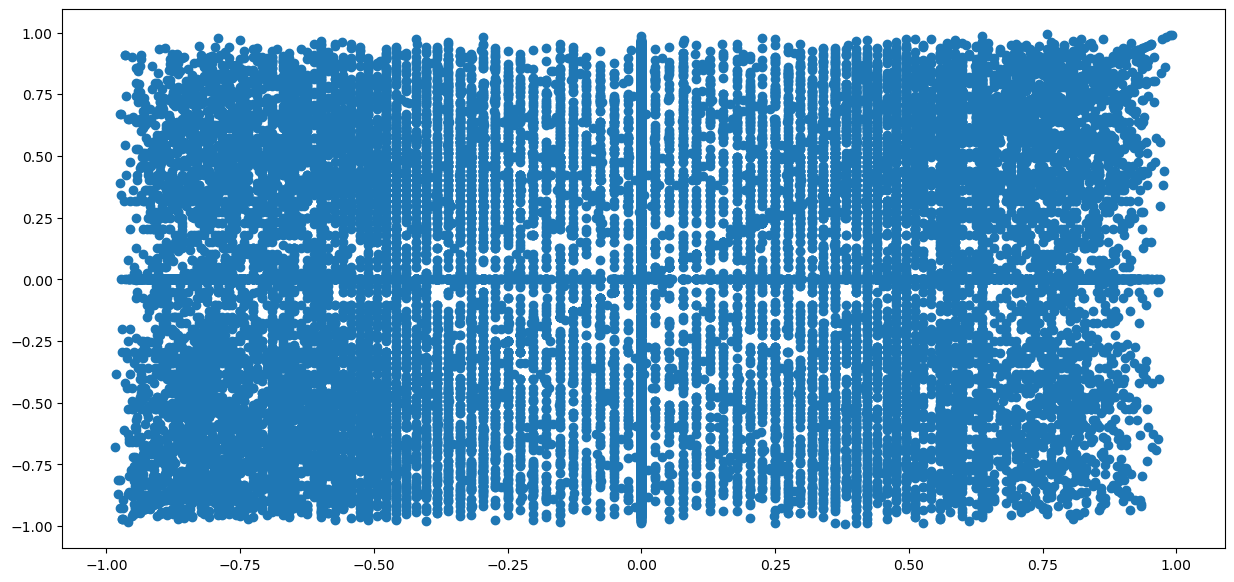

In [165]:
fig, ax = plt.subplots(figsize=(15,7))
plt.scatter(out['first_score'],out['last_score'])

In [118]:
#sort the movies according to sentiment
sentiment_df=pd.read_csv('sentiment_range_ending.csv')
pageviews=pd.read_csv('handled_data/movies_wikipedia_pageviews.csv')
#happy ending movies
happy_ending=sentiment_df[sentiment_df['last_score']>0]

print(happy_ending.head())
#sad ending movies
sad_ending=sentiment_df[sentiment_df['last_score']<0]
print(sad_ending.head())
happy_names=happy_ending.merge(data,left_on='movie_id',right_on='wikipedia_id')[['movie_id','name']]
happy_pageviews=happy_names.merge(pageviews,left_on='name',right_on='name')
happy_pageviews['pageviews'].min()



    Unnamed: 0  movie_id  first_score  last_score
0            0  23890098          1.0      0.0083
2            2  20663735         -1.0      0.6705
3            3   2231378         -1.0      0.8020
7            7  24225279          0.0      0.8957
10          10  15401493          1.0      0.8360
    Unnamed: 0  movie_id  first_score  last_score
4            4    595909          1.0     -0.5106
5            5   5272176          0.0     -0.6486
6            6   1952976          0.0     -0.6369
9            9  20532852          0.0     -0.3182
11          11  18188932         -1.0     -0.6369


0.0

In [119]:
summaries_df.sample(1)["summary"].values

array(["20 years after Magnus Edkvist  graduated from the ninth grade in Hagsätra, he gets an invitation to a class reunion. He declines the invitation, because he doesn't want to relive some of the most embarrassing moments of his life. Magnus rather stays home with his wife Lollo  and his daughter. But when Magnus starts to think about his teenage crush, Hillevi , and whether she will go or not. He decides to go to the reunion, in hope that Hillevi will show up."],
      dtype=object)

In [120]:
names_sentiment=sentiment_df.merge(data,left_on='movie_id',right_on="wikipedia_id")
names_sentiment[['movie_id','name','first_score','last_score']]

,movie_id,name,first_score,last_score
0,23890098,Taxi Blues,1.0,0.0083
1,31186339,The Hunger Games,0.0,0.0000
2,20663735,Narasimham,-1.0,0.6705
3,2231378,The Lemon Drop Kid,-1.0,0.8020
4,595909,A Cry in the Dark,1.0,-0.5106
...,...,...,...,...
42199,34808485,Oomakkuyil Padumbol,1.0,-0.4215
42200,1096473,The Last Command,0.0,0.8676
42201,35102018,Randy Parsons: American Luthier,0.0,0.8910
42202,8628195,Kabuliwala,0.0,0.0000


In [121]:
names_sentiment.to_csv('names_sentiment.csv')

In [122]:
sent_pageviews=names_sentiment.merge(pageviews,left_on='name',right_on='name')
sent_pageviews[['movie_id','name','first_score','last_score','pageviews']]

,movie_id,name,first_score,last_score,pageviews
0,23890098,Taxi Blues,1.0,0.0083,344.045455
1,2231378,The Lemon Drop Kid,-1.0,0.8020,1310.230237
2,595909,A Cry in the Dark,1.0,-0.5106,483.637187
3,20532852,Destination Meatball,0.0,-0.3182,26.397233
4,15401493,Husband for Hire,1.0,0.8360,434.850296
...,...,...,...,...,...
25975,26261438,Outlaw of Gor,1.0,-0.4767,1728.586957
25976,29046736,I Don't Want to Be Born,0.0,-0.6908,831.747530
25977,2867597,Mr. Bill's Real Life Adventures,1.0,0.1280,345.191041
25978,34808485,Oomakkuyil Padumbol,1.0,-0.4215,67.241271


In [244]:
sent_pageviews.sort_values('pageviews',ascending=0).head(50)

,Unnamed: 0,movie_id,first_score,last_score,wikipedia_id,freebase_id,name,release_date,box_office_revenue,runtime,languages,countries,genres,pageviews
14590,23299,30007,0.0,0.0000,30007,/m/07cz2,The Matrix,1999-03-31,4.635174e+08,135.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",371788.721591
19742,31785,471755,-1.0,0.3612,471755,/m/02dkqh,Doctor Who,1996,NaN,89.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/06n90"": ""Science Fiction"", ""/m/0cq23f0"": ...",293771.607708
17611,28203,24759927,-1.0,-0.6124,24759927,/m/08096cn,Don't Look Up,1996-03-02,NaN,NaN,"{""/m/03_9r"": ""Japanese Language""}",{},"{""/m/03npn"": ""Horror""}",259033.395751
7043,13788,23669556,0.0,0.1280,23669556,/m/06zs3p2,Friends,1938-11-01,NaN,100.0,"{""/m/06b_j"": ""Russian Language""}","{""/m/05vz3zq"": ""Soviet Union""}","{""/m/03bxz7"": ""Biographical film"", ""/m/082gq"":...",247536.067441
7045,28913,5671546,1.0,0.6124,5671546,/m/0dzbxn,Friends,2001,NaN,NaN,"{""/m/07c9s"": ""Tamil Language""}","{""/m/03rk0"": ""India""}","{""/m/02l7c8"": ""Romance Film"", ""/m/07s9rl0"": ""D...",247536.067441
7044,26606,20657842,1.0,-0.1027,20657842,/m/0522d5c,Friends,1999,NaN,NaN,"{""/m/0999q"": ""Malayalam Language""}","{""/m/03rk0"": ""India""}","{""/m/07s9rl0"": ""Drama"", ""/m/01z4y"": ""Comedy""}",247536.067441
7042,11142,5521767,1.0,0.7184,5521767,/m/0dqr6n,Friends,1971-03-24,NaN,101.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/068d7h"": ""Romantic drama"", ""/m/02l7c8"": ""...",247536.067441
2240,3472,4727,0.0,0.0000,4727,/m/01hpp,Batman,1966-07-30,NaN,104.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0gf28"": ""Parody"", ""/m/04pbhw"": ""Superhero...",214854.530632
2241,5522,4726,-1.0,-0.5106,4726,/m/01hp5,Batman,1989-06-19,4.113489e+08,126.0,"{""/m/064_8sq"": ""French Language"", ""/m/02h40lc""...","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/0lsxr"": ""Crime Fiction"", ""/m/01jfsb"": ""Th...",214854.530632
2242,40919,8915540,-1.0,-0.8402,8915540,/m/027phbc,Batman,1943,NaN,NaN,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/05swd"": ""Propaganda film"", ""/m/01g6gs"": ""...",214854.530632


In [129]:
import statsmodels.formula.api as smf

mod = smf.ols(formula='pageviews ~ first_score + last_score', data=sent_pageviews[sent_pageviews['pageviews']>1000])
np.random.seed(2)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              pageviews   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     5.630
Date:                Thu, 22 Dec 2022   Prob (F-statistic):            0.00360
Time:                        17:01:21   Log-Likelihood:            -1.0461e+05
No. Observations:                9285   AIC:                         2.092e+05
Df Residuals:                    9282   BIC:                         2.092e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    9192.7131    197.289     46.595      0.000    8805.983    9579.443
first_score  -519.3999    237.255     -2.189      0.029    -984.472     -54.328
last_score   1105.7723    409.439      2.701      0.007     303.183    1908.362
==============================================================================
Omnibus:                    10789.868   Durbin-Watson:                   1.620
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1321258.724
Skew:                           6.093   Prob(JB):                         0.00
Kurtosis:                      60.155   Cond. No.                         2.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

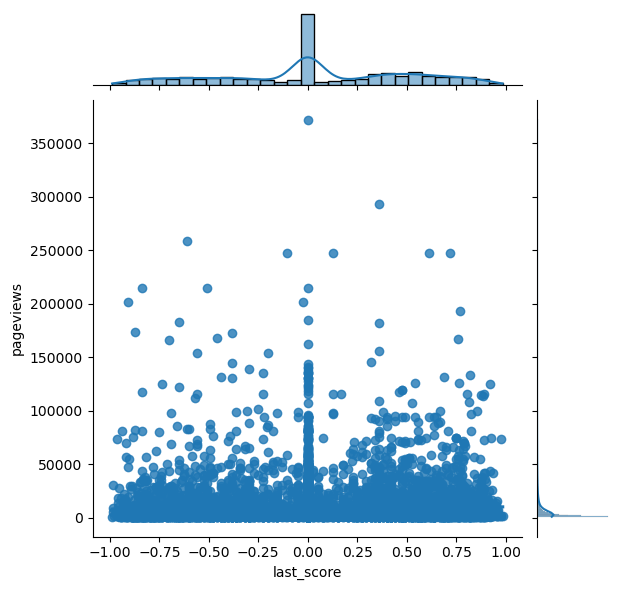

In [130]:
import seaborn as sns

h = sns.jointplot(data=sent_pageviews[sent_pageviews['pageviews']>1000], x='last_score', y='pageviews', kind="reg");

In [169]:
import plotly.express as px

df = pd.DataFrame({
    "Fruit": ["Apples", "Oranges", "Bananas", "Apples", "Oranges", "Bananas"],
    "Amount": [4, 1, 2, 2, 4, 5],
    "City": ["SF", "SF", "SF", "Montreal", "Montreal", "Montreal"]
})



fig = px.bar(df, x="Fruit", y="Amount", color="City", barmode="group")
fig

In [ ]:
##genres of interest: drama action comedy romance horror

In [207]:
get_summaries_df('Action')

8798


,movie_id,name,summary,length,num_words,genres
0,31186339,The Hunger Games,The nation of Panem consists of a wealthy Capi...,4559,778,"(Action/Adventure, Science Fiction, Action, Dr..."
1,20663735,Narasimham,Poovalli Induchoodan is sentenced for six yea...,3099,496,"(Musical, Action, Drama, Bollywood)"
2,5272176,End Game,The president is on his way to give a speech. ...,1937,344,"(Thriller, Action/Adventure, Action, Drama)"
3,1335380,Exodus,The film is based on the events that happened ...,4385,782,"(War film, Epic, Action/Adventure, Period piec..."
4,4596602,Ashes to Ashes,"Ashes to Ashes is set in London, England. The ...",2513,416,"(Thriller, Crime Fiction, Indie, Martial Arts ..."
...,...,...,...,...,...,...
5863,277160,Entrapment,"Virginia ""Gin"" Baker is an investigator for W...",2391,429,"(Action/Adventure, Crime Thriller, Action, Cri..."
5864,20402406,Season of the Witch,"In the 13th century, three women accused of wi...",5419,959,"(Thriller, Science Fiction, Adventure, Superna..."
5865,21972773,Guiness Vision,"The film revolves around Nandhan , a Lankan yo...",400,68,(Action)
5866,25758881,"Little Tokyo, U.S.A.","The story, set in late 1941, follows Los Angel...",1599,259,"(Action, Drama)"


In [243]:
sent_range=pd.read_csv('sentiment_range.csv')

no_neutral_mask=sent_range['first_score']!=0 

# sent_range=sent_range[no_neutral_mask]
no_neutral_mask
# def sentiment_genre(genre):
#     df=get_summaries_df(genre)
#     out=df.merge(sent_range,left_on='movie_id',right_on='movie_id')[['movie_id','name','first_score','last_score']]
#     out['genre']=str(genre)
#     return out.sample(1000)


0         True
1        False
2         True
3         True
4         True
         ...  
42298     True
42299    False
42300    False
42301    False
42302    False
Name: first_score, Length: 42303, dtype: bool

In [233]:

act_df=sentiment_genre('Action')
com_df=sentiment_genre('Comedy')
hor_df=sentiment_genre('Horror')
rom_df=sentiment_genre('Romance Film')
dra_df=sentiment_genre('Drama')
all=pd.concat([act_df,com_df,hor_df,rom_df,dra_df])
all


8798
16349
5280
10234
34007


,movie_id,name,first_score,last_score,genre
1050,8201004,Dick Tracy,-0.9442,-0.6597,Action
3461,8990197,The Undefeated,-0.9231,-0.4588,Action
4356,30889053,Fireball,-0.2500,0.3182,Action
3829,5813191,The January Man,0.4767,-0.7650,Action
495,28027063,Abduction,0.0000,-0.2023,Action
...,...,...,...,...,...
3217,3829646,What Have I Done To Deserve This?,0.0000,-0.7783,Drama
7058,6819522,"Don't Cry, It's Only Thunder",0.4939,0.8625,Drama
10475,8456500,This Thing of Ours,0.0000,-0.2263,Drama
9733,4488493,The Thorn Birds: The Missing Years,-0.8591,-0.5106,Drama


In [234]:


fig=px.scatter(all,x='first_score',y='last_score',color='genre')
fig


In [ ]:
# plot sum of pageviews for movies from top countries

# plot revenue for movies from top countries